<a href="https://colab.research.google.com/github/Avinash-Saudagar/Yes-Bank-Stock-Price-Prediction/blob/main/Yes_bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**

**Problem Statement** - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

**Let's Get to know what is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

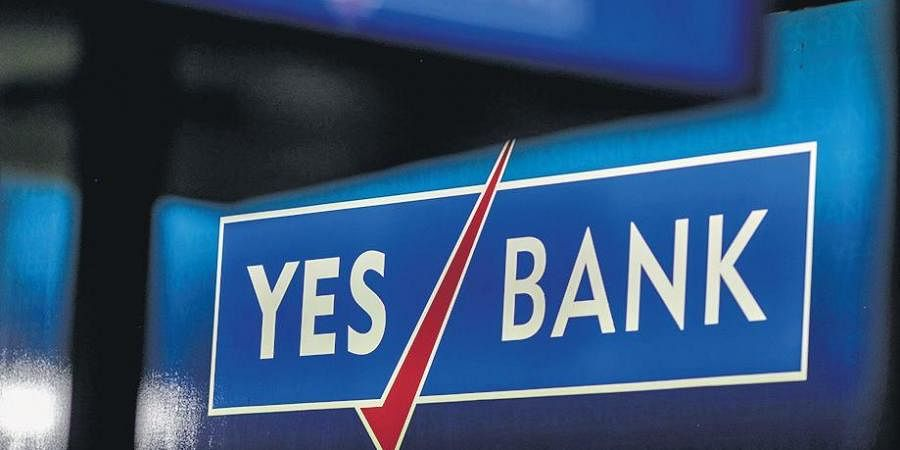

In [8]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Importing and Loading data**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Yes Bank/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [11]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


# **Data Exploration**

In [12]:
#information of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
#number of rows and columns 
dataset.shape

(185, 5)

In [14]:
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

This dataset has 185 observations in it with 5 columns(features)

# **Variable Identification and Understanding Data**

In [15]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [16]:
#Decription of dataset 
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2009-09-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


In [17]:
# Identify Numerical Columns
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

## **Checking for Null values and Outliers**

In [18]:
# Checking Null Values
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [19]:
# checking duplicate values
len(dataset[dataset.duplicated()])

0

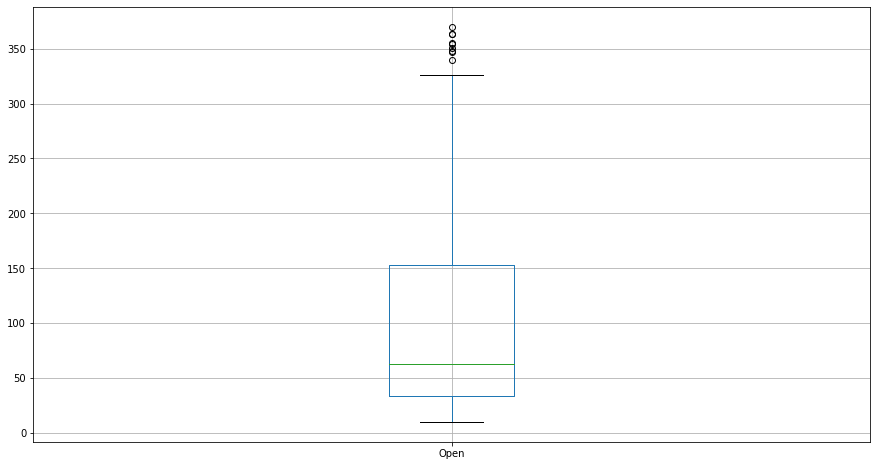

In [20]:
plt.figure(figsize=(15,8))
dataset.boxplot('Open')
plt.show()

# **Exploratory Data Analysis**

**Data Distribution and mean and median of each single Indpendent variable**

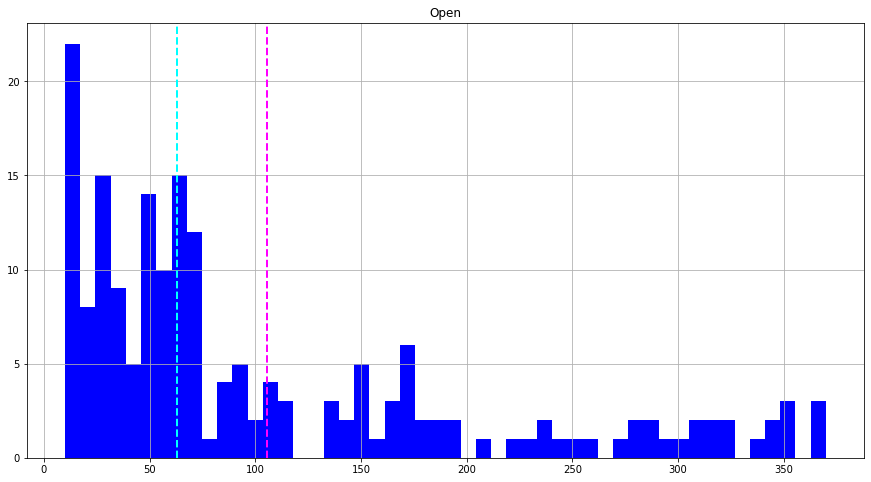

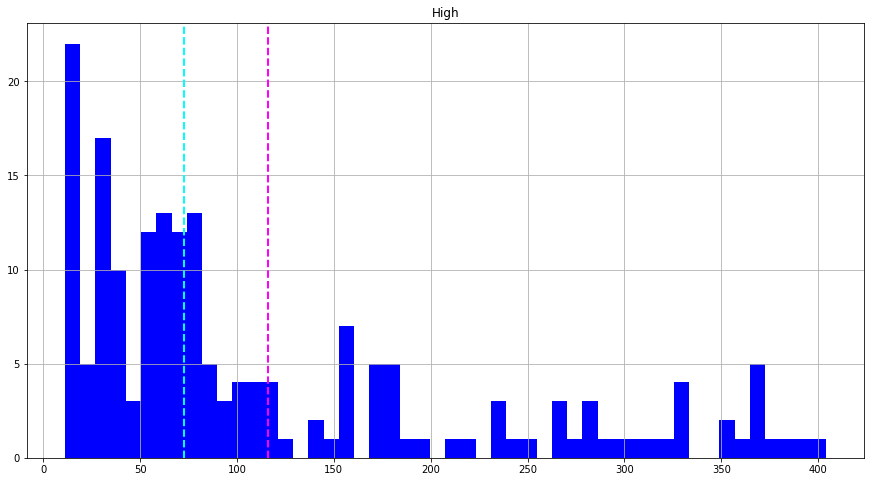

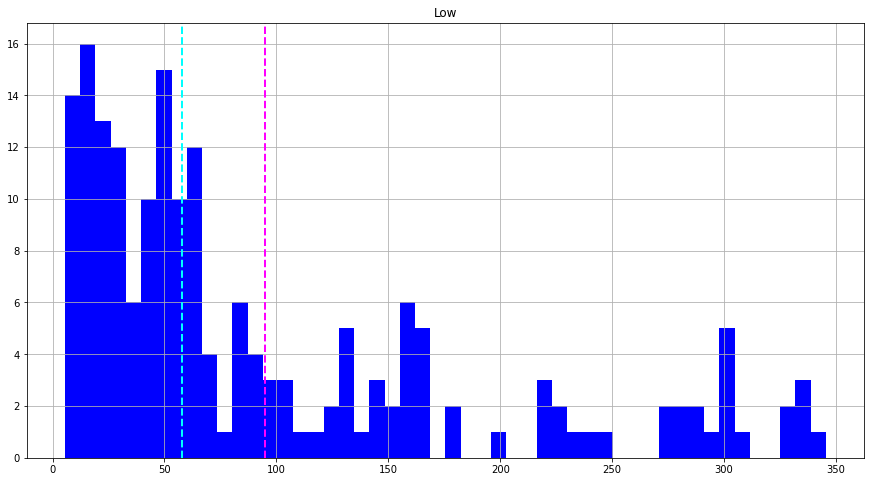

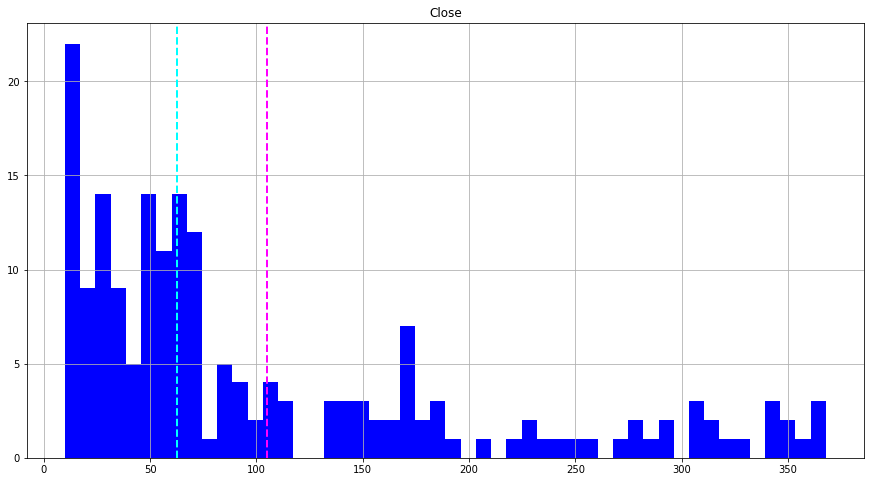

In [21]:
for i in numerical_col[:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'blue')
  ax.axvline(features.mean(),color = 'magenta',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'cyan',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)

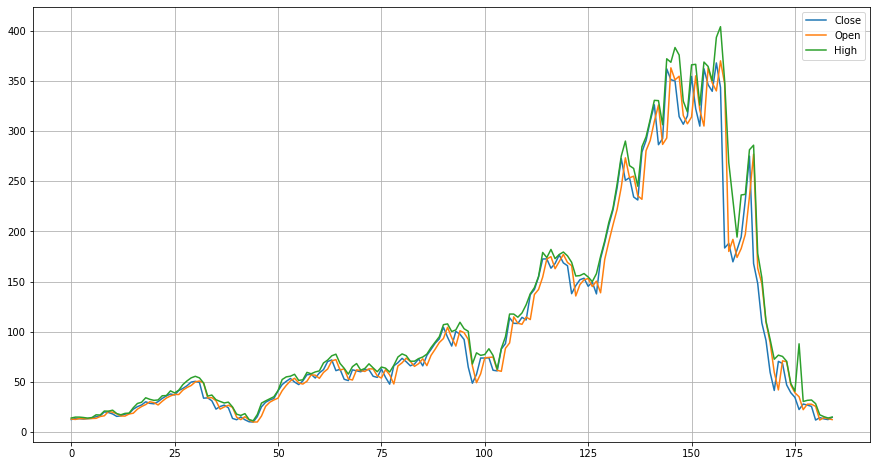

In [22]:
# Line Plot
plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

We can conclude that data is not normally distributed as mean is higher than median in all features. By using logarithmic transformation, we have to convert our columns into normal distribution dataset.

**Dependent Variable**

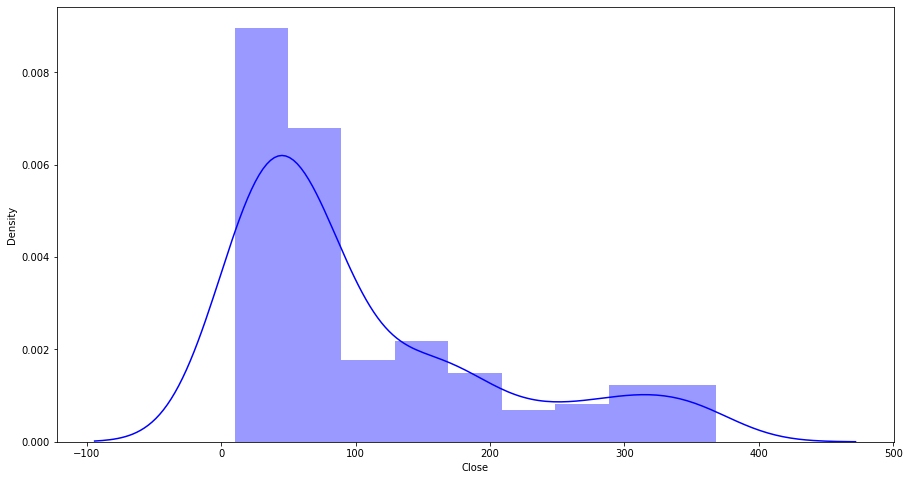

In [23]:
plt.figure(figsize=(15,8))
sns.distplot(dataset['Close'],color='blue')
plt.show()

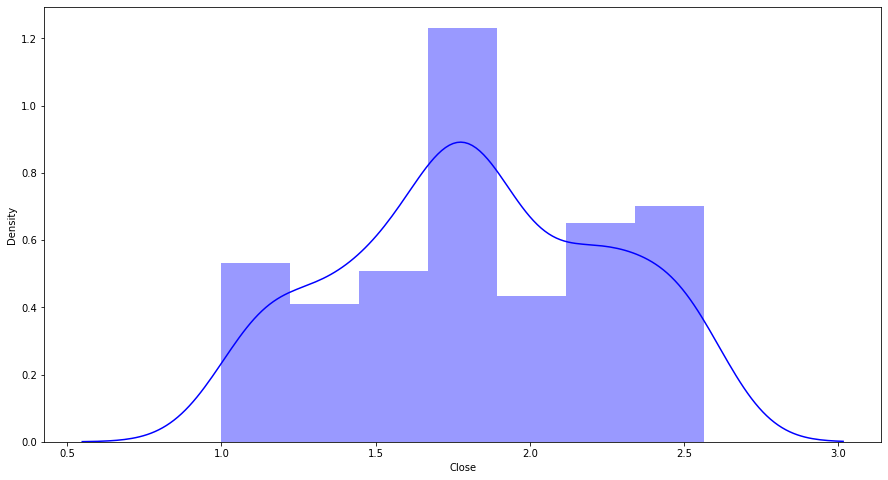

In [24]:
# For normal Distribution 
plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()

**Independent Variable**

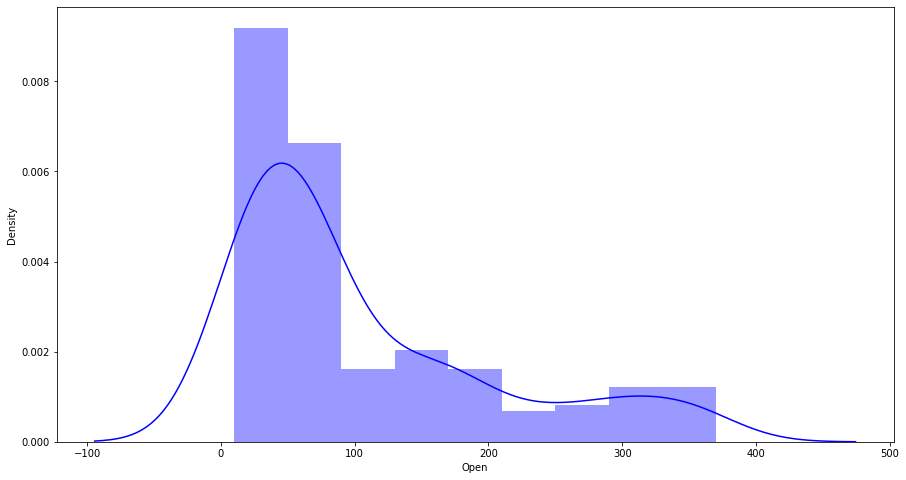

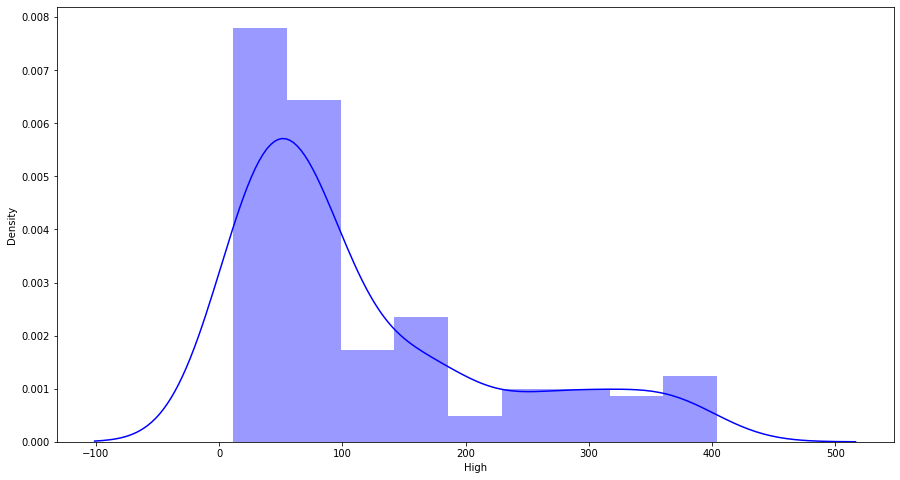

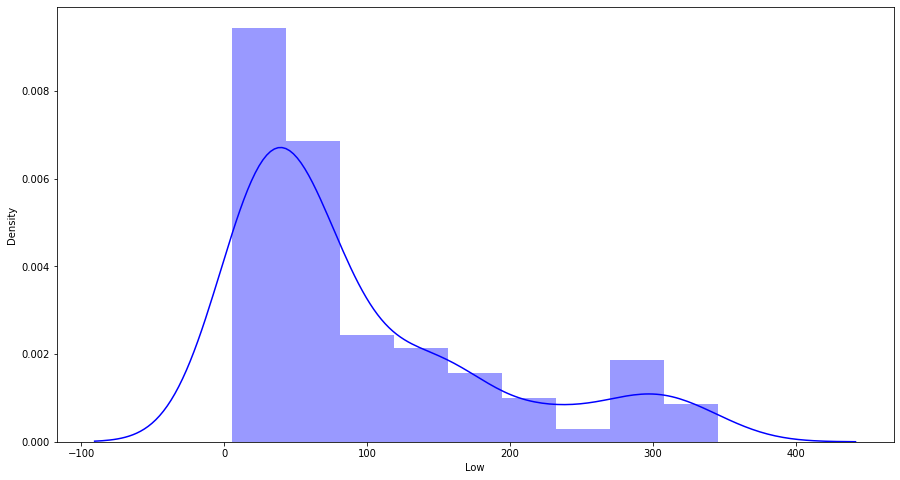

In [25]:
# Independent variables
plt.figure(figsize=(15,8))
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

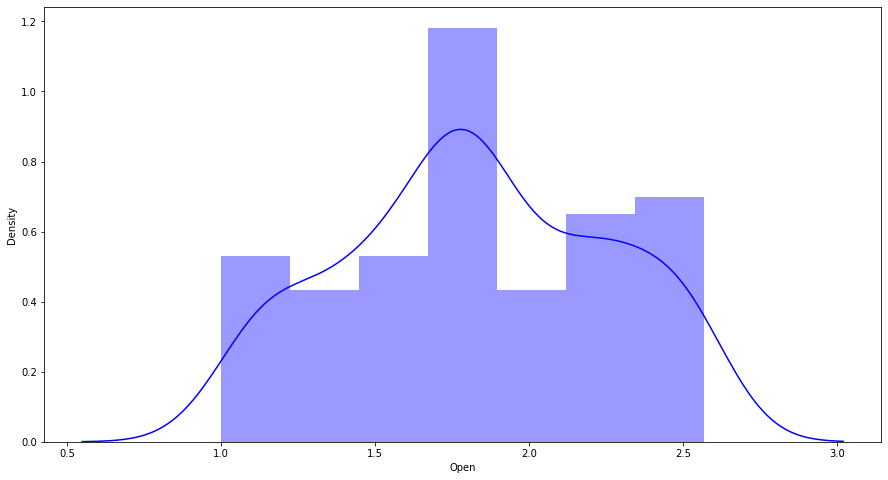

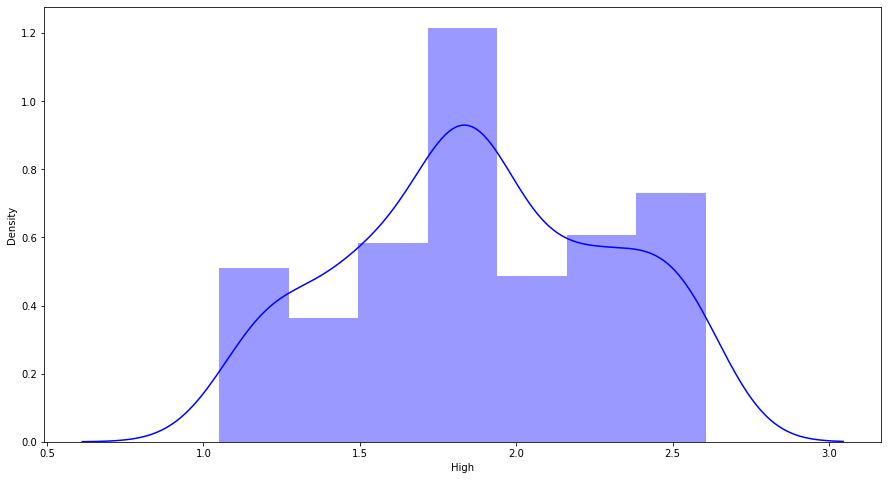

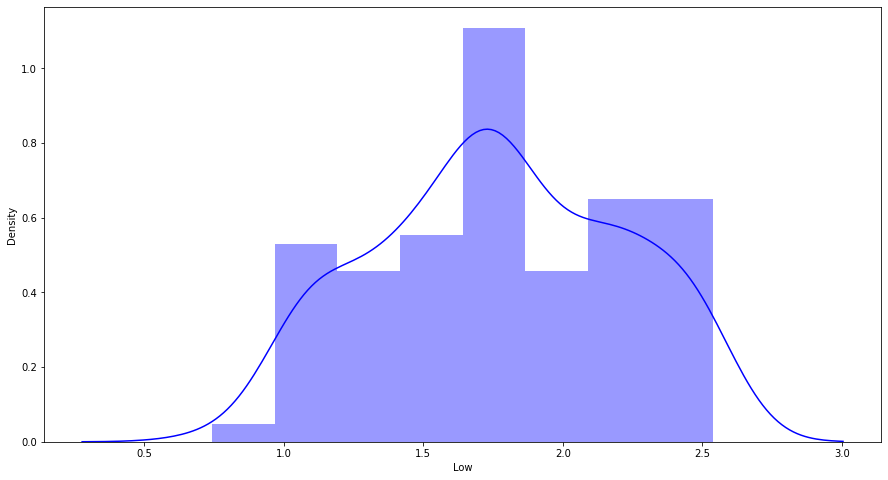

In [26]:
# For normal Distribution 

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')